In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
data_train_path = 'garbage_classification/train'
data_test_path = 'garbage_classification/test'
data_val_path = 'garbage_classification/validation'

In [7]:
img_width = 180
img_height = 180

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 12689 files belonging to 12 classes.


In [9]:
data_cat = data_train.class_names

In [10]:
print(data_cat)

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [11]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1381 files belonging to 12 classes.


In [12]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1763 files belonging to 12 classes.


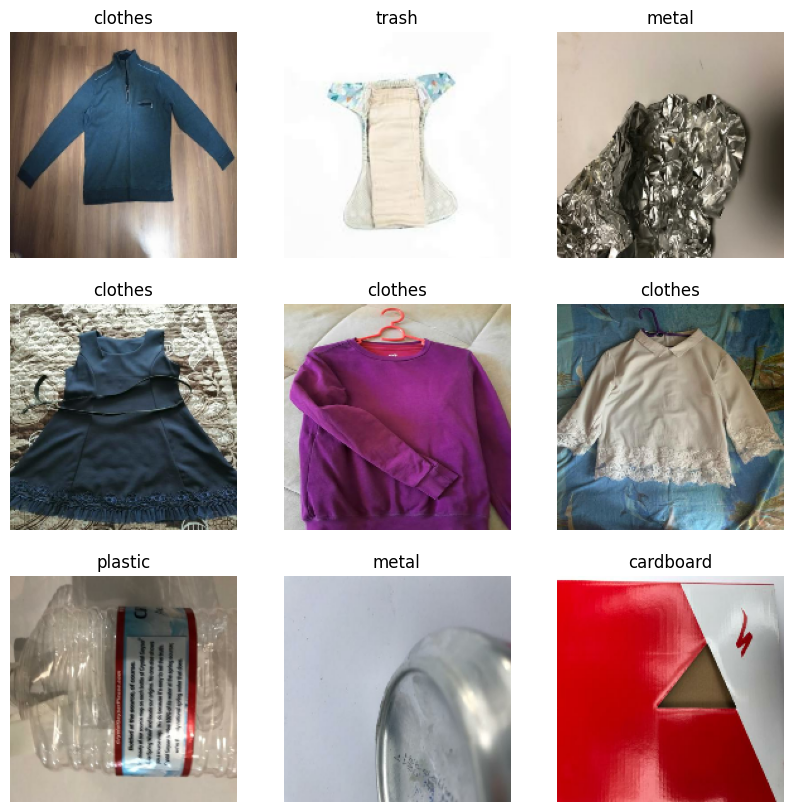

In [13]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs=epochs_size)

Epoch 1/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 87s 211ms/step - accuracy: 0.4948 - loss: 1.6089 - val_accuracy: 0.5293 - val_loss: 1.3965
Epoch 2/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 80s 200ms/step - accuracy: 0.7303 - loss: 0.8378 - val_accuracy: 0.5764 - val_loss: 1.2686
Epoch 3/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 79s 199ms/step - accuracy: 0.7992 - loss: 0.6249 - val_accuracy: 0.6054 - val_loss: 1.4329
Epoch 4/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 83s 209ms/step - accuracy: 0.8475 - loss: 0.4607 - val_accuracy: 0.6169 - val_loss: 1.5985
Epoch 5/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 80s 202ms/step - accuracy: 0.8937 - loss: 0.3126 - val_accuracy: 0.6039 - val_loss: 1.9369
Epoch 6/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 80s 202ms/step - accuracy: 0.9279 - loss: 0.2246 - val_accuracy: 0.6300 - val_loss: 2.0063
Epoch 7/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 81s 203ms/step - accuracy: 0.9424 - loss: 0.1782 - val_accuracy: 0.6061 - val_loss: 2.2458
Epoch 8/25
397/397 ━━━━━━━━━━━━━━━━━━━━ 83s 209ms/step - accuracy: 0.9520 - loss: 0

Text(0.5, 1.0, 'Loss')

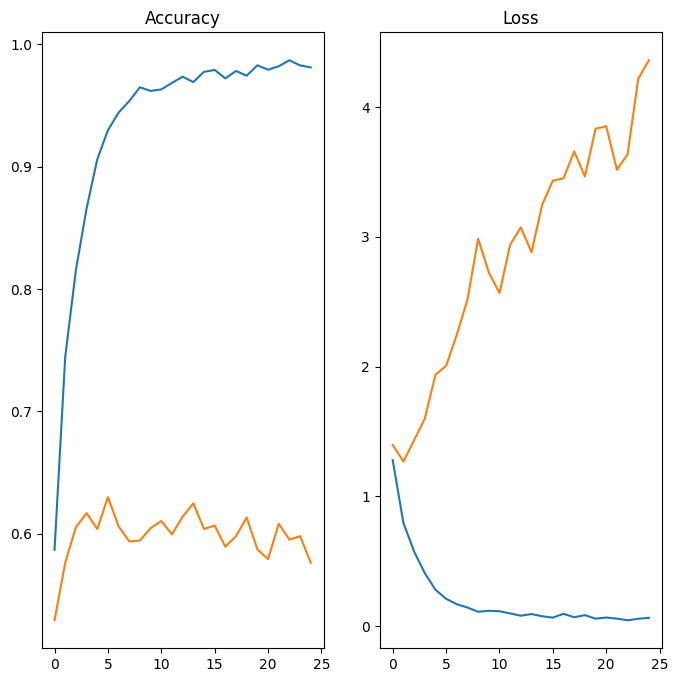

In [19]:
 epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [20]:
image = 'download (3).jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [21]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [22]:
score = tf.nn.softmax(predict)

In [23]:
print('Waste type is {} with accuracy of {:0.2f}'.format(data_cat[numpy.argmax(score)],numpy.max(score)*100))

Waste type is clothes with accuracy of 95.25


In [24]:
model.save('visualizer.keras')

In [25]:
model.save('visualizer.h5')